In [2]:
# import libraries
import pandas as pd

## Exploratory data analysis

In [4]:
# read the dataset
df=pd.read_csv('CoineBase/coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')

In [5]:
# print the head of the dataset
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,1417412100,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,1417412160,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,1417412220,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [6]:
# print df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574274 entries, 0 to 1574273
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Timestamp          1574274 non-null  int64  
 1   Open               1574274 non-null  float64
 2   High               1574274 non-null  float64
 3   Low                1574274 non-null  float64
 4   Close              1574274 non-null  float64
 5   Volume_(BTC)       1574274 non-null  float64
 6   Volume_(Currency)  1574274 non-null  float64
 7   Weighted_Price     1574274 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 96.1 MB


In [8]:
# print df describe
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,1.574274e+06,1.574274e+06,1.574274e+06,1.574274e+06,1.574274e+06,1.574274e+06,1.574274e+06,1.574274e+06
mean,1.468131e+09,1.705118e+03,1.706025e+03,1.704113e+03,1.705123e+03,7.073412e+00,2.267928e+04,1.705069e+03
std,2.728500e+07,3.059038e+03,3.061434e+03,3.056505e+03,3.059105e+03,1.698569e+01,1.225156e+05,3.058976e+03
min,1.417412e+09,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,2.641700e-06,6.000000e-02
25%,1.444527e+09,2.903000e+02,2.904100e+02,2.901800e+02,2.903000e+02,6.915000e-01,3.162361e+02,2.903031e+02
50%,1.468141e+09,5.900500e+02,5.902100e+02,5.899800e+02,5.900200e+02,2.381500e+00,1.398624e+03,5.900207e+02
75%,1.491756e+09,1.224490e+03,1.224810e+03,1.224090e+03,1.224490e+03,7.032457e+00,7.601787e+03,1.224453e+03
max,1.515370e+09,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.563267e+03,1.997076e+07,1.989199e+04


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026402A57348>,
      dtype=object)

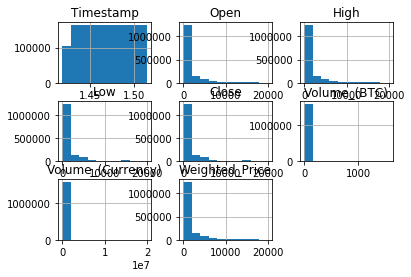

In [9]:
# visualize the data set
df.hist()

In [10]:
# check missing values
df.isnull().any()

Timestamp            False
Open                 False
High                 False
Low                  False
Close                False
Volume_(BTC)         False
Volume_(Currency)    False
Weighted_Price       False
dtype: bool

In [13]:
# check  duplicates
df.duplicated().sum()

0

## Data Cleaning

In [17]:
# change the date format of timestamp column
#df['Timestamp']=df['Timestamp'].dt.strftime('%m/%d/%Y')
#df['Timestamp']=pd.to_datetime(df['Timestamp'],format='%d/%m/%Y')